# EDA Blueprint

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML, display

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

import os

# Set base plotting style
plt.style.use('seaborn-ticks')
# # Set base plotting size
plt.rcParams['figure.figsize'] = 14, 9
# Magic word for producing visualizations in notebook
%matplotlib inline
# Increase figure resolution for high dpi screens
%config InlineBackend.figure_format = 'retina'
# Autoreload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Business / Problem understanding

### Data Challenge Description:

Channel KLMN is based in Los Angeles and airs a weekly national political talk show creatively called “US Politics This Week”. Their only TV commercial advertising “US Politics This Week” features the Mayor of Los Angeles. A data scientist at Channel KLMN found that a large fraction of people who saw the commercial for “US Politics This Week” and watched the show are from Los Angeles, while a much lower fraction of people from other cities who saw the commercial watched the show. They then brought this to the attention of the team that produces “US Politics This Week”.

The Executive Producer of “US Politics This Week” suggested that they make TV commercials tailored to some of the biggest cities in the US that feature the Mayors of those cities (i.e., a commercial to be shown in New York City that features the Mayor of New York City, a commercial to be shown in Chicago that features the Mayor of Chicago, etc.). Channel KLMN decided to produce these new commercials and then aired the new commercials in their respective cities, in addition to airing the old commercial (featuring the Mayor of Los Angeles) in all cities as well.

After running the experiment, the data scientist was surprised to find that the test is negative. That is, a lower fraction of people who saw the commercials with their local Mayor watched “US Politics This Week” as compared to people who saw the commercial with the Mayor of Los Angeles!


Your job is to:
* Reproduce the negative result found above. Is it actually negative?
* Explain what might be happening. Are the commercials with local Mayors really driving a lower fraction of people to watch the show?
* If you found something wrong with the experiment, design an algorithm that returns FALSE if the problem happens again in the future and TRUE if everything is good and the results can be trusted. If you didn’t find anything wrong with the experiment, what is your recommendation to the Executive Producer of “US Politics This Week” regarding whether or not they should continue airing the new commercials?


Data:
**test_data.csv columns:**  
**viewer_id**: the ID of the viewer  
**date**: the date the viewer saw a commercial for “US Politics This Week”  
**tv_make**: the make (i.e., brand) of TV  
**tv_size**: the size of the TV in inches (approximately measured as the diagonal of the screen)  
**uhd_capable**: whether the TV is (1) or is not (0) capable of displaying Ultra-High-Definition television content  
**tv_provider**: the cable or satellite TV provider  
**total_time_watched**: the total amount of TV watched (in hours) on the day in the ‘date’ column  
**watched**: whether the viewer watched (1) “US Politics This Week” or not (0)  
**test**: viewers are split into test (1) and control (0) groups; test viewers saw the new commercial with their local   Mayor while control viewers saw the old commercial with the Mayor of Los Angeles  

**viewer_data.csv columns:**  
**viewer_id**: the ID of the viewer; same ID as in the test_data.csv file  
**gender**: the viewer’s gender  
**age**: the viewer’s age  
**city**: the viewer’s city  


**What we are looking for:**
1. A 15-minute presentation of your findings. Submit this along with your work. This presentation will be presented during your time onsite, if you are advanced.
2. Please describe the problem (don’t assume the audience knows the problem but do not spend more than 3 minutes in this step).
3. Your work, saved as HTML or a PDF, showing your investigation, how you arrived at your conclusions, etc.

### Main points breakdown

** Null Hypothesis**
A lower fraction of people who saw the commercials with their local Mayor watched “US Politics This Week” as compared to people who saw the commercial with the Mayor of Los Angeles

- Run the experiment again

## Data understanding  - EDA

### Data Loading

In [8]:
def read_data_csv(data_folder, file_name, args=[]):
    '''Takes data_folder path and file name and
    use os and pandas.read_csv to load the data.
    Optional args (list) are passed to read_csv'''
    
    data_folder = os.path.relpath('data')
    file_name = ''
    file_path = os.path.join(data_folder, file_name)
    df = pd.read_csv(file_path, *args)
    return df

In [11]:
! ls data

test_data.csv  viewer_data.csv


In [12]:
test_data = pd.read_csv('data/test_data.csv')

In [9]:
test_data = read_data_csv('data', 'test_data.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

### Overview

In [35]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.shape

(51392, 141)

In [ ]:
df.info()

In [ ]:
df.describe()

### Missing values

In [26]:
# How many nans?
print('Total percentage of Nans: ',
      round(df.isnull().sum().sum() / np.product(df.shape) * 100, 2),
      '%')

Total percentage of Nans:  45.32 %


####  Per Feature

In [39]:
def hist_box_plot(x, x_label, y_label, bin_incr):
    '''Take an array as input and draw a histogram with a boxblot above it'''
    f, (ax_box, ax_hist) = plt.subplots(2,
                                        sharex=True,
                                        gridspec_kw={
                                            "height_ratios": (.15, .85)},
                                        figsize=(14, 6))

    sns.boxplot(x, ax=ax_box)
    bins = np.arange(0, x.max() + bin_incr, bin_incr)
    x.hist(grid=False, bins=bins)
    ax_box.set(yticks=[])
    ax_hist.set_ylabel(y_label)
    ax_hist.set_xlabel(x_label)
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [40]:
feat_nan_perc = df.isnull().mean()

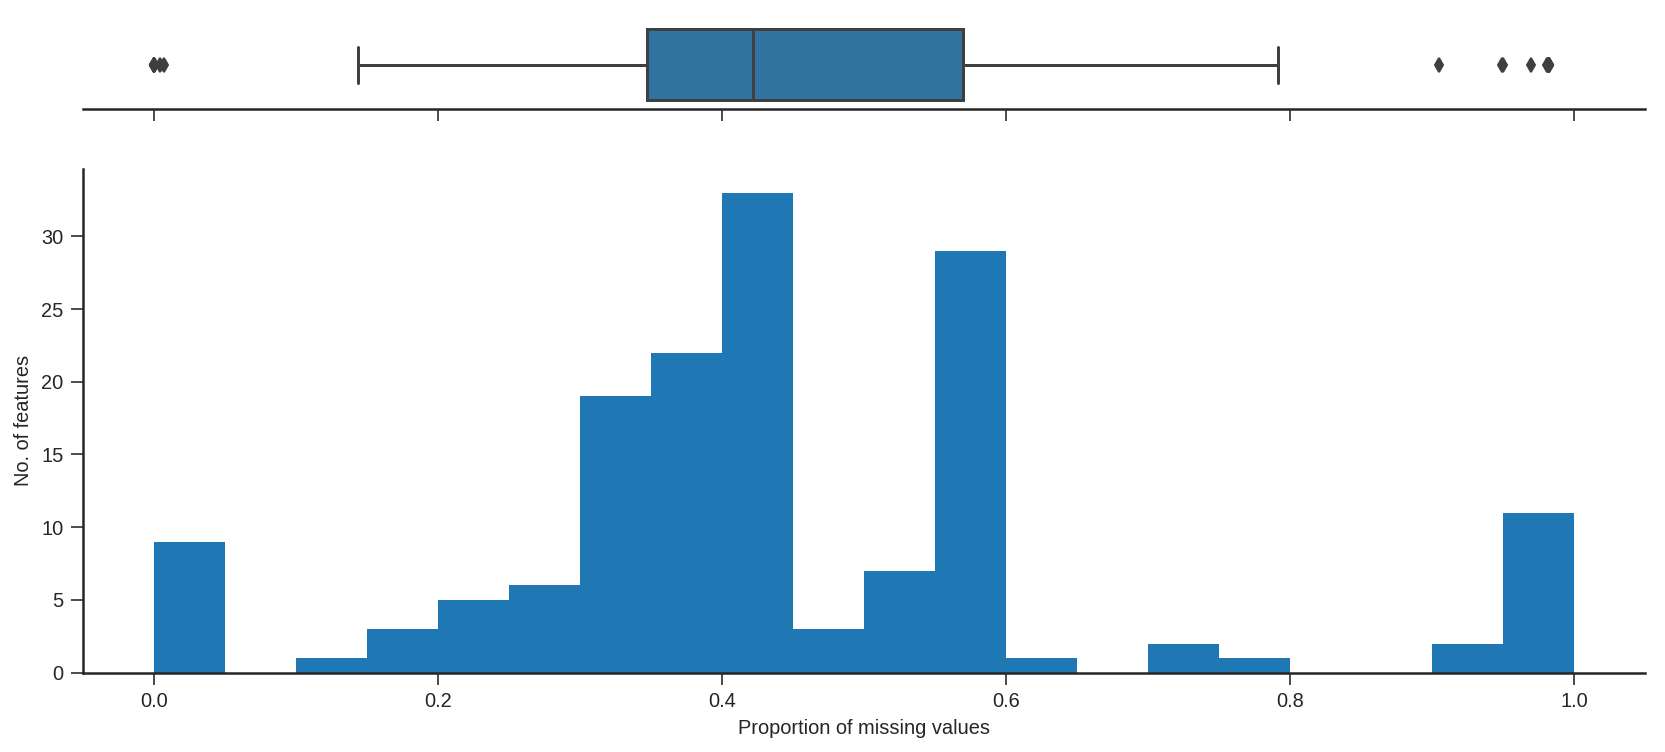

In [42]:
hist_box_plot(feat_nan_perc, x_label='Proportion of missing values', y_label='No. of features', bin_incr=0.05);

The biggest percentage of columns has 30 - 60 % missing values with two peaks at arond 40% and just beelow 60%. There is also a spike of features with a percentage of missing values close to 100 %. Features with a percentage of missing values above 80% ca be considered outliers and not containig=ng enough usefull infomation and will be dropped for this analysis.

In [44]:
df.isnull().mean().sort_values()[-20::]

InfluenceConsultants    0.580771
Currency                0.583437
HoursPerWeek            0.599159
HaveWorkedFramework     0.606378
Overpaid                0.739512
Salary                  0.749163
WebDeveloperType        0.791874
NonDeveloperType        0.904849
TimeAfterBootcamp       0.949370
ExpectedSalary          0.950070
MobileDeveloperType     0.969781
YearsCodedJobPast       0.981048
ExCoderSkills           0.981807
ExCoderActive           0.981904
ExCoderBelonged         0.981943
ExCoderBalance          0.982040
ExCoderReturn           0.982040
ExCoderWillNotCode      0.982059
ExCoderNotForMe         0.982079
ExCoder10Years          0.982157
dtype: float64

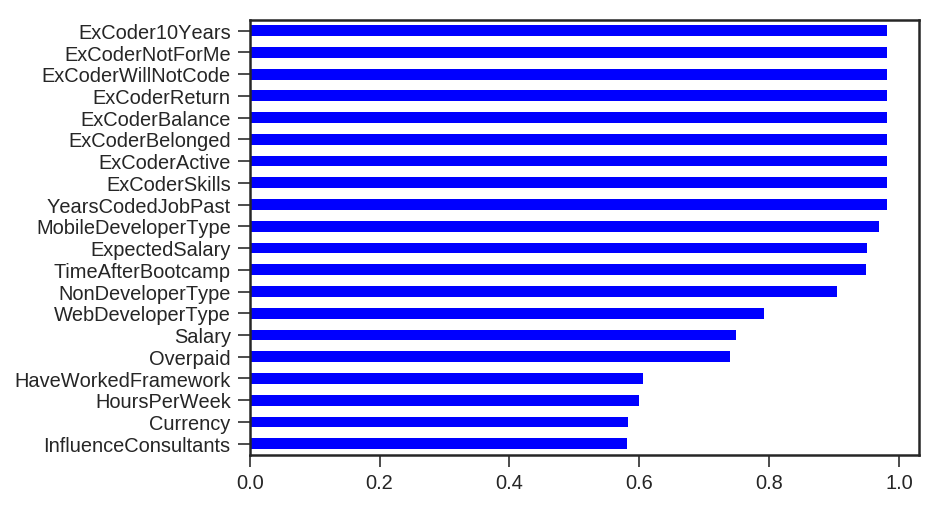

In [47]:
df.isnull().mean().sort_values()[-20::].plot(kind='barh', color='b');

In [45]:
high_nan_features = df.columns[df.isnull().mean() > 0.8]
high_nan_features

Index(['YearsCodedJobPast', 'MobileDeveloperType', 'NonDeveloperType',
       'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years',
       'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode',
       'ExCoderActive', 'TimeAfterBootcamp', 'ExpectedSalary'],
      dtype='object')

In [46]:
len(high_nan_features)

13

There are 13 features with NaNs above 18% - 6 of them refer to the `Excoder` category. `ExpectedSalary` has 95% missing values.

In [48]:
# Drop the high NaN features
df = df.drop(columns=high_nan_features)

In [49]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.shape

(51392, 141)

### Per Row

In [52]:
row_nan_perc = df.isnull().mean(axis=1) 

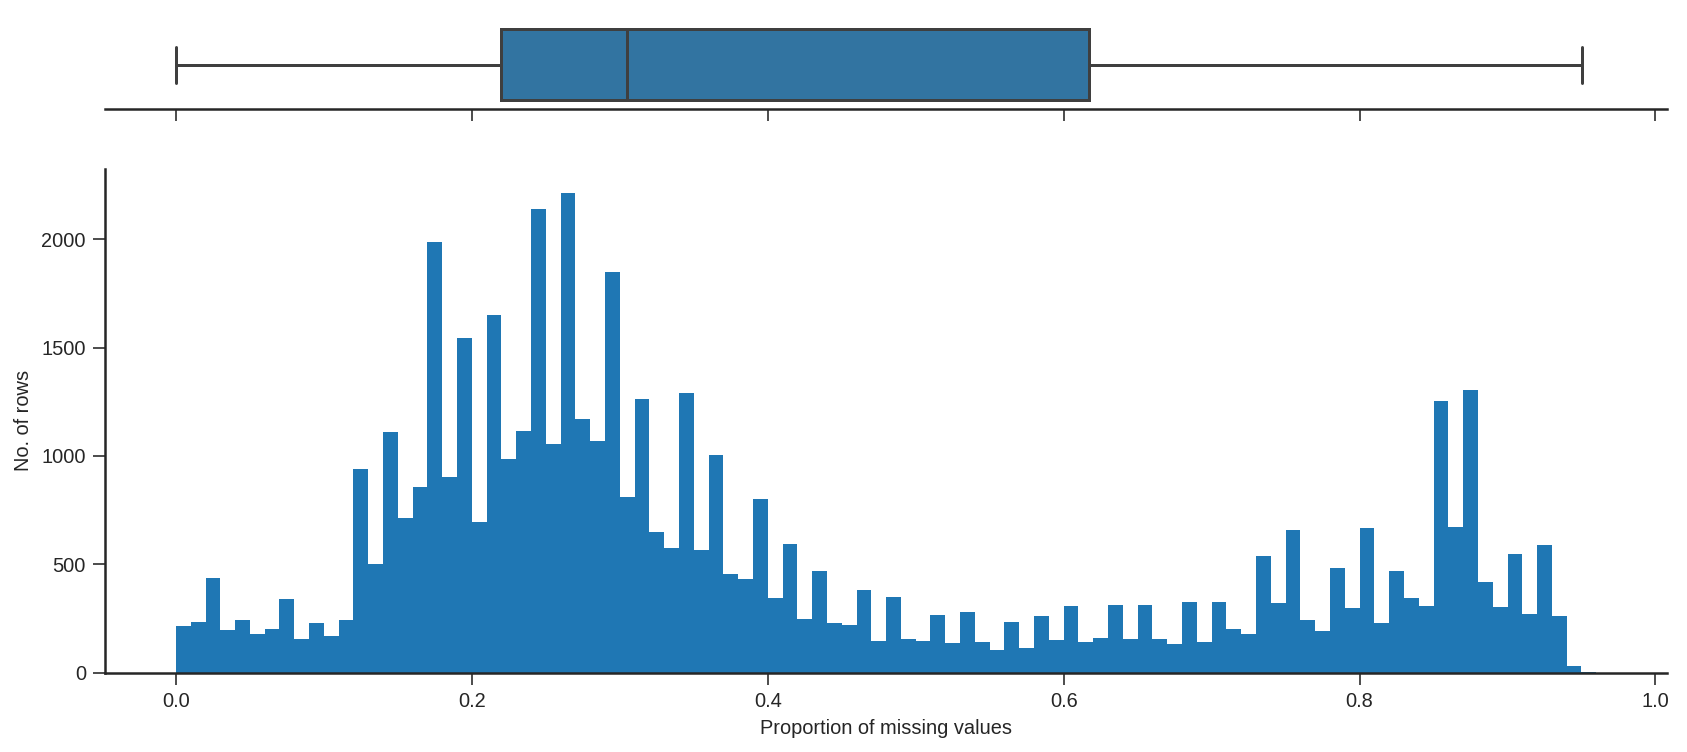

In [54]:
hist_box_plot(row_nan_perc, x_label='Proportion of missing values', y_label='No. of rows', bin_incr=0.01);

Looks like a bimodal distribution with one distribution centered around the median of 30% missing values and the smaller one around 90% of missing values

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 141 entries, Respondent to Salary
dtypes: float64(5), int64(1), object(135)
memory usage: 55.3+ MB


In [57]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000
